In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image
import tensorflow as tf

In [ ]:
#dog = imread('/content/gdrive/MyDrive/Images/n02085620-Chihuahua/n02085620_10131.jpg')

In [ ]:
#plt.imshow(dog)

In [ ]:
import os
import shutil
import random
import glob

os.getcwd()

'/content'

In [ ]:
#Create Validation Folder
#os.chdir('/content/gdrive/MyDrive/')
#os.getcwd()

#if os.path.exists('train_filtered'):
#    shutil.rmtree('train_filtered')

#if os.path.exists('valid'):
#    shutil.rmtree('valid')

#os.makedirs('valid')
#os.makedirs('train_filtered')

    
#train name in drive

#for item in random.sample(glob.glob('Images/*'), 120):

#    glob_item = glob.glob(item+'/*')

#    valid_percent = int(len(glob_item) - len(glob_item) * 0.6) #take 40% of images
#    train_percent = len(glob_item) - valid_percent

#    breed_name = item.split('/')[1]
        
#    receipt_folder = '/content/gdrive/MyDrive/valid/' + breed_name
#    os.makedirs(receipt_folder)

    #validation folder
#    for j in random.sample(glob.glob(item+'/*'), valid_percent):
#        shutil.copy(j, receipt_folder)

#    receipt_folder = '/content/gdrive/MyDrive/train_filtered/' + breed_name
#    os.makedirs(receipt_folder)
        
    #train_filtered folder
#    for k in random.sample(glob.glob(item+'/*'), train_percent):
#            shutil.copy(k, receipt_folder)

In [ ]:
train_dir='/content/gdrive/MyDrive/train_filtered'
valid_dir='/content/gdrive/MyDrive/valid'

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical'
)

Found 12400 images belonging to 120 classes.


In [ ]:
val_gen = val_datagen.flow_from_directory(
    valid_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical'
)

Found 8185 images belonging to 120 classes.


In [ ]:
type(train_gen)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
imgs, labels = next(train_gen)

In [ ]:
imgs
print(imgs.shape)
print(labels.shape)

(32, 150, 150, 3)
(32, 120)


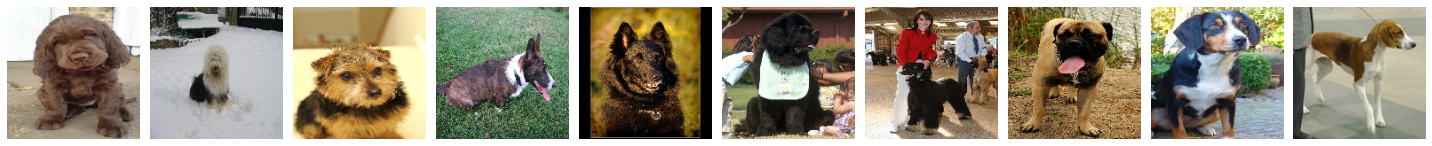

In [ ]:
plotImages(imgs)

In [ ]:
print(labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Construction du CNN

In [ ]:
inputs = tf.keras.layers.Input(shape=(2, ))

In [ ]:
# Maintenant, ns travaillons sur des images, ns indiquons 
# les dim de l'image => (heigth, width, mode)
# del model

inputs = tf.keras.layers.Input(shape=(150, 150, 3))
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Flatten()(x)
#x = tf.keras.layers.Dense(64, activation='relu')(x)

x = tf.keras.layers.Dense(512, activation='relu')(x)
#x = tf.keras.layers.Dense(1, activation='relu')(x)

outputs = tf.keras.layers.Dense(120, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0   

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], 
              optimizer='adam')

In [ ]:
history = model.fit_generator(train_gen, epochs=20, steps_per_epoch=100, validation_data=val_gen, validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 [==============================] - 1046s 10s/step - loss: 4.8604 - acc: 0.0141 - val_loss: 4.7885 - val_acc: 0.0113
Epoch 2/15
100/100 [==============================] - 799s 8s/step - loss: 4.7747 - acc: 0.0144 - val_loss: 4.7124 - val_acc: 0.0231
Epoch 3/15
100/100 [==============================] - 638s 6s/step - loss: 4.6522 - acc: 0.0264 - val_loss: 4.5181 - val_acc: 0.0431
Epoch 4/15
100/100 [==============================] - 500s 5s/step - loss: 4.4597 - acc: 0.0456 - val_loss: 4.3973 - val_acc: 0.0787
Epoch 5/15
100/100 [==============================] - 390s 4s/step - loss: 4.1853 - acc: 0.1161 - val_loss: 4.1799 - val_acc: 0.1369
Epoch 6/15
100/100 [==============================] - 306s 3s/step - loss: 3.7823 - acc: 0.2123 - val_loss: 3.8950 - val_acc: 0.2000
Epoch 7/15
100/100 [==============================] - 243s 2s/step - loss: 3.3823 - acc: 0.3038 - val_loss: 3.7638 - val_acc: 0.2469
Epoch 8/15
100/100 [==============================] - 209s 2s/step 

In [ ]:
def curves():
    # Retrieve a list of accuracy results on training and validation data
    # sets for each training epoch
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    # Retrieve a list of list results on training and validation data
    # sets for each training epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')

    plt.figure()

    # Plot training and validation loss per epoch
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')

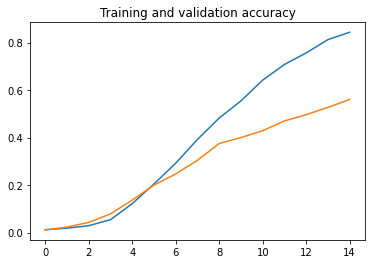

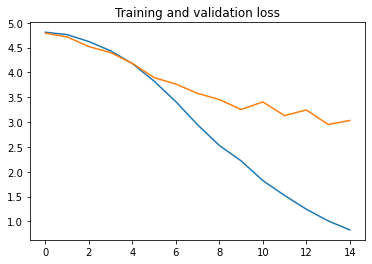

In [ ]:
curves()

In [ ]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

Data Augmentation

In [ ]:
#train_datagen = ImageDataGenerator(
#    rescale=1./255,
#    rotation_range=40,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    zoom_range=0.2,
#    shear_range=0.2,
#    horizontal_flip=True,)

# Note that the validation data should not be augmented!
#val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
#train_generator = train_datagen.flow_from_directory(
#        train_dir,   # This is the source directory for training images
#        target_size=(150, 150),  # All images will be resized to 150x150
#        batch_size=32,
#        class_mode='categorical')

# Flow validation images in batches of 32 using val_datagen generator
#validation_generator = val_datagen.flow_from_directory(
#        valid_dir, 
#        target_size=(150, 150),
#        batch_size=32,
#        class_mode='categorical')

In [ ]:
#inputs = tf.keras.layers.Input(shape=(150, 150, 3))
#x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(inputs)
#x = tf.keras.layers.MaxPooling2D(2)(x)
#x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
#x = tf.keras.layers.MaxPooling2D(2)(x)
#x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
#x = tf.keras.layers.MaxPooling2D(2)(x)
#x = tf.keras.layers.Flatten()(x)

#x = tf.keras.layers.Dense(512, activation='relu')(x)

#outputs = tf.keras.layers.Dense(120, activation='softmax')(x)

#model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
#model.summary()

In [ ]:
#model.compile(loss='categorical_crossentropy', metrics=['acc'], 
              #optimizer='adam')

In [ ]:
#history = model.fit_generator(train_generator, epochs=25, steps_per_epoch=100, validation_data=validation_generator, validation_steps=50)

In [ ]:
#curves()

DROP out

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
inputs = tf.keras.layers.Input(shape=(150, 150, 3))
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Flatten()(x)
#x = tf.keras.layers.Dense(64, activation='relu')(x)

x = tf.keras.layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)

outputs = tf.keras.layers.Dense(120, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0   

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], 
              optimizer='adam')

In [ ]:
history = model.fit_generator(train_gen, epochs=20, steps_per_epoch=100, validation_data=val_gen, validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 [==============================] - 112s 1s/step - loss: 4.8141 - acc: 0.0102 - val_loss: 4.7853 - val_acc: 0.0106
Epoch 2/15
100/100 [==============================] - 104s 1s/step - loss: 4.7827 - acc: 0.0149 - val_loss: 4.7612 - val_acc: 0.0156
Epoch 3/15
100/100 [==============================] - 99s 989ms/step - loss: 4.7260 - acc: 0.0213 - val_loss: 4.6394 - val_acc: 0.0237
Epoch 4/15
100/100 [==============================] - 100s 996ms/step - loss: 4.6221 - acc: 0.0326 - val_loss: 4.5953 - val_acc: 0.0444
Epoch 5/15
100/100 [==============================] - 100s 1s/step - loss: 4.5244 - acc: 0.0462 - val_loss: 4.3640 - val_acc: 0.0613
Epoch 6/15
100/100 [==============================] - 98s 981ms/step - loss: 4.3623 - acc: 0.0592 - val_loss: 4.3421 - val_acc: 0.0719
Epoch 7/15
100/100 [==============================] - 99s 987ms/step - loss: 4.2394 - acc: 0.0860 - val_loss: 4.1103 - val_acc: 0.1194
Epoch 8/15
100/100 [==============================] - 95s 94

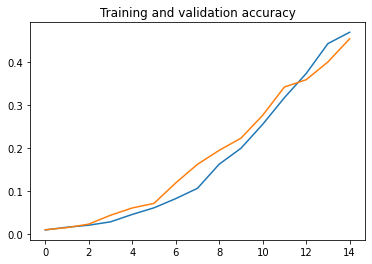

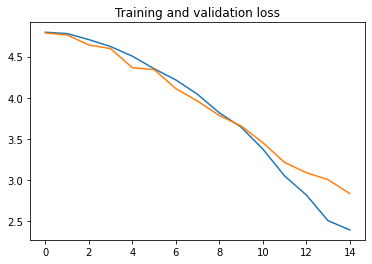

In [ ]:
curves()

In [ ]:
model.evaluate_generator(val_gen)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[2.8270678520202637, 0.44056200981140137]

In [ ]:
# Prediction
y_proba = model.predict_generator(val_gen)
y_proba


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


array([[8.6028874e-03, 2.2383846e-04, 3.0997492e-04, ..., 1.8256232e-02,
        2.4656303e-02, 8.2180667e-04],
       [1.6291149e-02, 1.2362727e-03, 9.3249949e-03, ..., 7.1755151e-04,
        1.2708294e-04, 4.3732077e-03],
       [6.4593536e-05, 1.7281403e-05, 2.7892595e-05, ..., 5.5239270e-06,
        7.3204953e-09, 9.3475273e-06],
       ...,
       [2.6826225e-03, 1.2885229e-04, 1.4082775e-01, ..., 3.4336106e-05,
        2.4274900e-06, 1.1984558e-06],
       [1.3502295e-03, 5.0083403e-03, 2.3748146e-03, ..., 4.7973921e-03,
        2.0241239e-03, 1.1213632e-02],
       [7.1370596e-05, 2.2539854e-02, 2.1087241e-04, ..., 3.9719780e-05,
        7.2587945e-06, 1.1553242e-03]], dtype=float32)

In [ ]:
import pandas as pd

pd.Series(y_proba.flatten()).head()

0    0.008603
1    0.000224
2    0.000310
3    0.012110
4    0.000332
dtype: float32

In [ ]:
y_pred = (y_proba > 0.5).astype('int32')

In [ ]:
imgs, labels = next(val_gen)  
imgs

array([[[[0.5568628 , 0.5372549 , 0.41960788],
         [0.5686275 , 0.54901963, 0.43137258],
         [0.5764706 , 0.5568628 , 0.43921572],
         ...,
         [0.1764706 , 0.18823531, 0.1137255 ],
         [0.25882354, 0.27450982, 0.27058825],
         [0.14901961, 0.15294118, 0.12156864]],

        [[0.5647059 , 0.54509807, 0.427451  ],
         [0.5764706 , 0.5568628 , 0.43921572],
         [0.58431375, 0.5647059 , 0.44705886],
         ...,
         [0.1764706 , 0.18823531, 0.1137255 ],
         [0.25882354, 0.27450982, 0.27058825],
         [0.15294118, 0.15686275, 0.1254902 ]],

        [[0.57254905, 0.5529412 , 0.43529415],
         [0.58431375, 0.5647059 , 0.44705886],
         [0.5921569 , 0.57254905, 0.454902  ],
         ...,
         [0.20392159, 0.21568629, 0.14117648],
         [0.25490198, 0.27058825, 0.26666668],
         [0.15686275, 0.16078432, 0.12941177]],

        ...,

        [[0.01960784, 0.01960784, 0.01176471],
         [0.01960784, 0.01960784, 0.01176471]

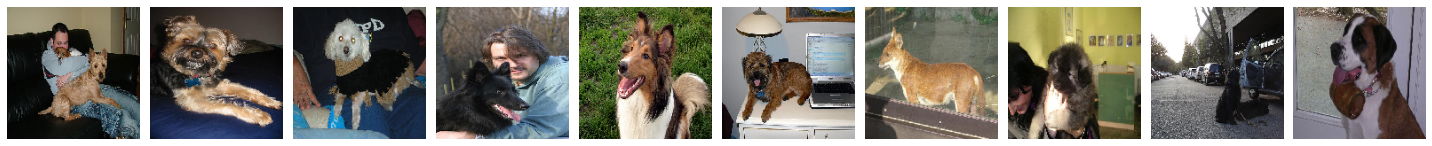

In [ ]:
plotImages(imgs)

In [ ]:
model.save('model_dog.h5')